In [86]:
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
# https://www.cboe.com/us/indices/dashboard/skew/
sdf = pd.read_csv('https://cdn.cboe.com/api/global/us_indices/daily_prices/SKEW_History.csv')
vdf = pd.read_csv('https://cdn.cboe.com/api/global/us_indices/daily_prices/VIX_History.csv')
spy = yf.Ticker('SPY').history(period="max")

In [110]:
spy = spy.rename(columns={'Close':'SPY'})
spy['Date']=spy.index
spy = spy[['SPY','Date']]
spy.Date = spy.Date.apply(lambda x: x.date())
spy.index = pd.RangeIndex(len(spy.index))

In [111]:
vdf = vdf[['DATE','CLOSE']]
vdf = vdf.rename(columns={'CLOSE':'VIX'})
df = sdf.merge(vdf,how='left',on='DATE')
df.DATE=df.DATE.apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y').date())
df = df.rename(columns={'DATE':'Date'})
df = df.merge(spy,how='left',on='Date')
df.index = df.Date
df=df[['VIX','SKEW','SPY']]

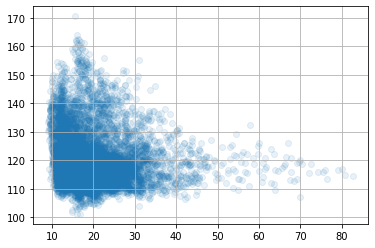

In [112]:
plt.scatter(df.VIX,df.SKEW,alpha=0.1)
plt.grid(True)

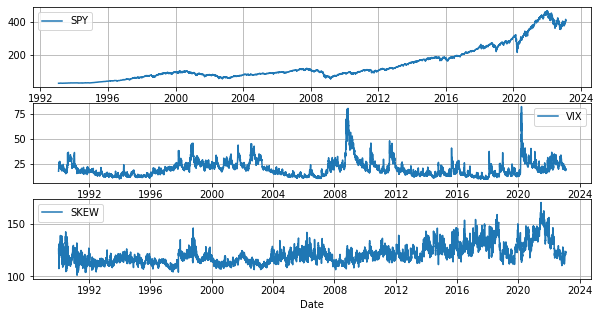

In [121]:
plt.figure(figsize=(10,5))
idx = 0
plt.subplot(311)
df.iloc[idx:]['SPY'].plot()
plt.legend()
plt.grid(True)
plt.subplot(312)
df.iloc[idx:]['VIX'].plot()
plt.legend()
plt.grid(True)
plt.subplot(313)
df.iloc[idx:]['SKEW'].plot()
plt.legend()
plt.grid(True)

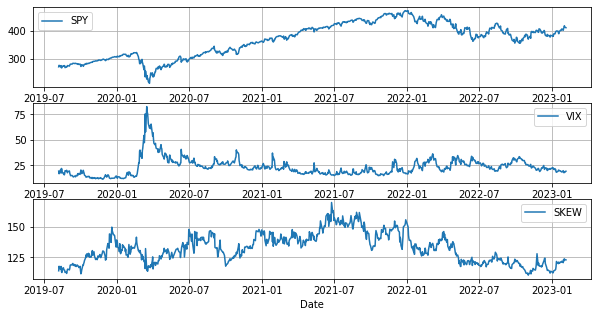

In [122]:
plt.figure(figsize=(10,5))
idx = int(-252*3.5)
plt.subplot(311)
df.iloc[idx:]['SPY'].plot()
plt.legend()
plt.grid(True)
plt.subplot(312)
df.iloc[idx:]['VIX'].plot()
plt.legend()
plt.grid(True)
plt.subplot(313)
df.iloc[idx:]['SKEW'].plot()
plt.legend()
plt.grid(True)